# DESKRIPSI PROYEK
1. Menemukan penumpang dan dampak faktor eksternal terhadap sebuah Perjalanan
2. Menemukan pola pada informasi yang tersedia
3. Menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pra Pemrosesan

### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Memuat menampilkan informasi data

In [ ]:
table_1 = '/datasets/project_sql_result_01.csv'
table_2 = '/datasets/project_sql_result_04.csv'
table_3 = '/datasets/project_sql_result_07.csv'

df_1 = pd.read_csv(table_1)
df_2 = pd.read_csv(table_2)
df_3 = pd.read_csv(table_3)

#### df_1

In [ ]:
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df_1.shape

(64, 2)

In [ ]:
df_1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
df_1.duplicated().sum()

0

Kesimpulan Df_1

1. df_1 menampilkan data yang berisi nama perusahaan dan jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.
2. dan pada df_1 tidak diperlukan perbaikan data lebih lanjut dikarenakan tidak ada data yang hilang, duplicate dan type data yang sudah benar

#### df_2

In [ ]:
df_2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
df_2.shape

(94, 2)

In [ ]:
df_2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
df_2.duplicated().sum()

0

Kesimpulan Df_2

1. df_2 menampilkan data yang berisi nama wilayah di Chicago tempat perjalanan berakhir dan  jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.
2. dan pada df_2 diperlukan perbaikan data pada kolom average_trips menjadi integer, dikarenakan jumlah rata rata perjalan tidak mungkin koma

#### df_3

In [ ]:
df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
df_3.shape

(1068, 3)

In [ ]:
df_3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
df_3.duplicated().sum()

197

Kesimpulan Df_3

1. df_3 menampilkan data yang berisi ntanggal dan waktu penjemputan, kondisi cuaca saat perjalanan dimulai dan durasi perjalanan dalam satuan detik
2. dan pada df_2 diperlukan perbaikan data pada tipe kolom strat_ts menjadi tipe data datetime

### Memperbaiki Tipe Data

In [ ]:
#memperbaiki tipe data df_2 average_trips menjadi int
df_2['average_trips'] = df_2['average_trips'].apply(np.ceil).astype('int')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
#memperbaiki tipe data df_3 starts_ts menjadi datetime
df_3['start_ts'] = df_3['start_ts'].astype('datetime64')

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


KESIMPULAN

Kita memiliki 3 dataframe/tabel yang berbeda yang memiliki kolom yang berbeda. dengan tidak adanya data duplikat dan data yang hilang tetapi memiliki jumlah baris yang berbeda di setiap tabel. dan tipe data yang kurang tepat sudha diperbaiki seperti tipe data start_ts menjadi datetime, dan average_trips menjadi integer.

## Analisis Data

###  10 wilayah teratas yang menjadi kota tujuan

In [ ]:
top_10_dropoff = df_2.sort_values('average_trips',ascending=False).head(10)

In [ ]:
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


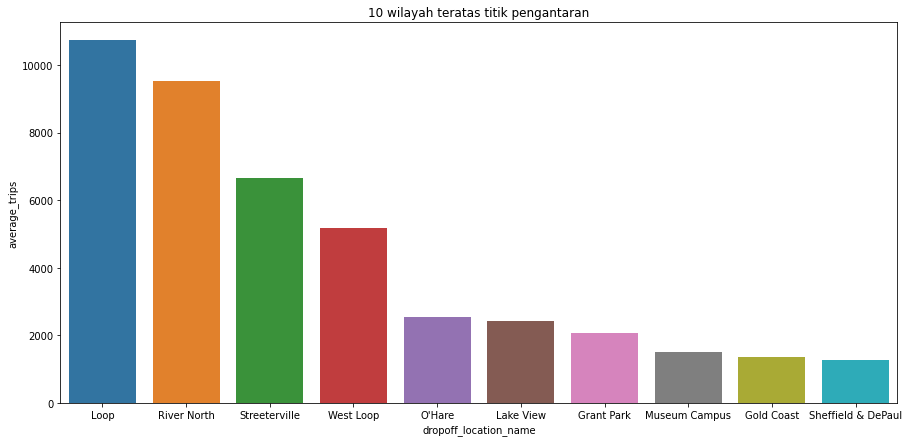

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('10 wilayah teratas titik pengantaran')
sns.barplot(data = top_10_dropoff, x='dropoff_location_name',y='average_trips')

plt.show()

Kesimpulan

dapat dilihat pada grafik yang memiliki jumlah rata rata kota tujuan, kota yang sering dikunjungi adalah kota Loop dengan rata rata 10728 kunjungan.

### 10 company teratas dari rata rata perjalanan

In [ ]:
top_10_comp = df_1.sort_values('trips_amount',ascending=False).head(10)

In [ ]:
top_10_comp

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


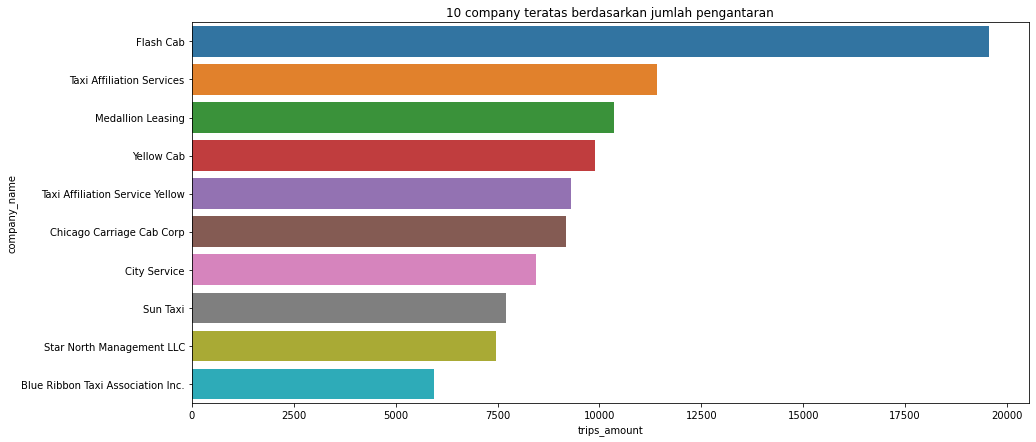

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('10 company teratas berdasarkan jumlah pengantaran')
sns.barplot(data = top_10_comp, x='trips_amount',y='company_name',)

plt.show()

Kesimpulan

Perusahaan taksi yang memiliki jumlah pengantaran terbanyak adalah Perusahaan Flash Cab yang mendominasi dengan jumlah 19558 pengantaran, dan jauh di atas dari perusahaan lain nya

## Menguji Hipotesis

Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

### Cek Data df_3

In [ ]:
df_3.head(3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


In [ ]:
df_3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Nilai max pada data lebih tinggi 3x di bandingkan nilai rata rata dan 75% data, yang bisa kita anggap data tersebut memiliki Outlier.

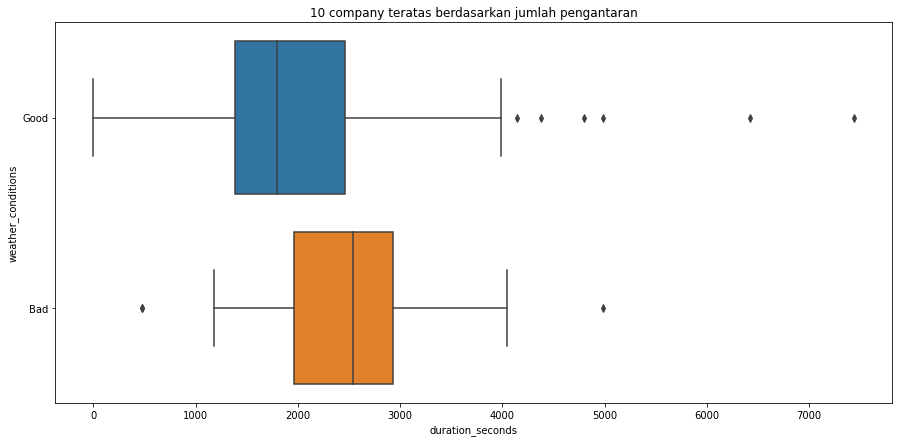

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('durasi perjalanan berdasarkan kondisi cuaca')
sns.boxplot(data = df_3, x='duration_seconds',y='weather_conditions')

plt.show()

In [ ]:
# menentukan batas atas dan bawah
def batas_atas(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (1.5 * IQR)
    return batas_atas
#Fungsi Batas bawah sebuah Outlier
def batas_bawah(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    return batas_bawah

In [ ]:
upper_wisker = batas_atas(df_3['duration_seconds'])
lower_wisker = batas_bawah(df_3['duration_seconds'])

print('Batas bawah =',lower_wisker)
print('Batas atas =',upper_wisker)

Batas bawah = -274.375
Batas atas = 4292.625


Dikarenakan duration_seconds bukan data yang minus, maka batas bawah dirubah menjadi 0, karena ga mungkin waktu perjalanan nya di bawah 0.

In [ ]:
df_3_no_outlier = df_3[(df_3['duration_seconds'] > 0) &
                      (df_3['duration_seconds'] < upper_wisker)]

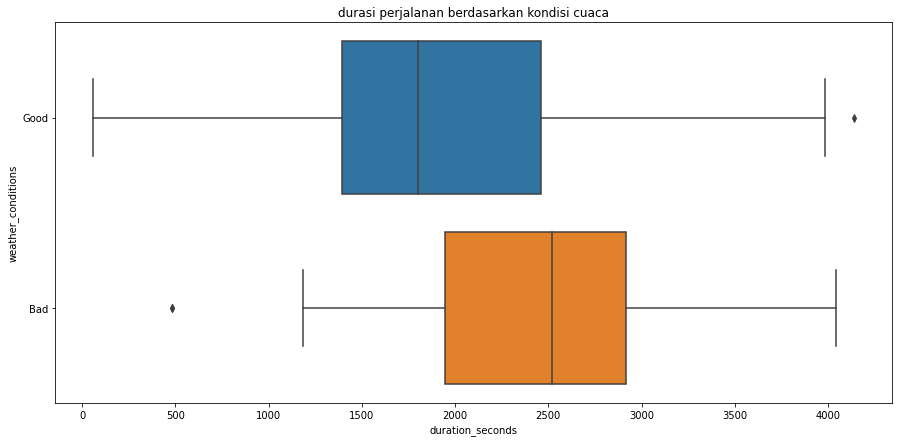

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('durasi perjalanan berdasarkan kondisi cuaca')
sns.boxplot(data = df_3_no_outlier, x='duration_seconds',y='weather_conditions')

plt.show()

### Test Hipotesis dari data df_3_no_outlier

Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan

1. Null Hypotesis(H0) Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare SAMA pada hari Sabtu yang hujan
2. Alternatif Hypotesis (H1) Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK SAMA/ BERUBAH pada hari Sabtu yang hujan

In [ ]:
df_3_no_outlier.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
df_3_no_outlier['weather_conditions'].value_counts()

Good    877
Bad     179
Name: weather_conditions, dtype: int64

In [ ]:
#memisahkan 2 kondisi cuaca
good_weather = df_3_no_outlier[df_3_no_outlier['weather_conditions'] == 'Good']
bad_weather = df_3_no_outlier[df_3_no_outlier['weather_conditions'] == 'Bad']

In [ ]:
#Varians 2 Paket
var_good_weather = np.var(good_weather['duration_seconds'])
var_bad_weather = np.var(bad_weather['duration_seconds'])
print('Varians dari kolom duration_seconds cuaca Good adalah :',var_good_weather)
print('Varians dari kolom duration_seconds adalah :',var_bad_weather)

Varians dari kolom duration_seconds cuaca Good adalah : 473991.7496388771
Varians dari kolom duration_seconds cuaca Bad adalah : 483684.220342686


Dikarenakan hasil varians dari cuaca Good dan Bad, tidak terlalu jauh, maka equal_var=True

In [ ]:
print('Rata rata waktu perjalanan saat cuaca Good adalah', good_weather['duration_seconds'].mean())
print('Rata rata waktu perjalanan saat cuaca Bad adalah', bad_weather['duration_seconds'].mean())

Rata rata waktu perjalanan saat cuaca Good adalah 1992.8072976054732
Rata rata waktu perjalanan saat cuaca Bad adalah 2412.9441340782123


In [ ]:
hip_weather = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'],equal_var = True)
alpha = 0.05
print('p-value: ', hip_weather.pvalue)

if hip_weather.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  2.3968233040077725e-13
Kita menolak hipotesis nol


## KESIMPULAN

Setelah melakukan Eksplorasi data, Analisis dan Hipotesis didapat beberapa Insight sebagai berikut :
1. Kota yang paling banyak dikunjungi oleh Penyedia transportasi Taksi adalah kota Loop
2. Perusahaan yang paling banyak melakukan pengantaran adalah perusahaan Flash Cab dimana total layanan sebanyak 19558 perjalanan
3. Rata rata Waktu Perjalanan yang dibutuhkan dari kota Loop ke bandara pada Hari sabtu yang memiliki Cuaca Good lebih sedikit/ lebih cepat sampai, dibanding dengan Cuaca Bad/Buruk.
4. Hipotesis Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari sabtu saat cuaca hujan dengan cuaca bagus adalah Sama , DITOLAK